In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import pandas as pd
import lmfit as lm
import sys
from scipy import signal
SEED = 35010732 # from random.org
np.random.seed(SEED)
np.set_printoptions(threshold=sys.maxsize)

Text(0, 0.5, '"Light Concentration" - $L_{b}$')

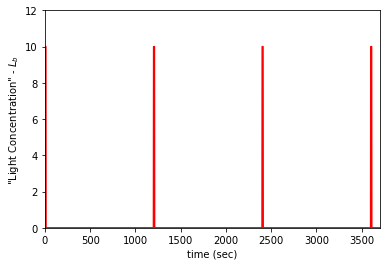

In [34]:
#12 second pulse every 20 min
e = np.zeros((180000,))
lif = 10 #light intensity factor
i = 0
ie = 11
for x in e:
    e[i:ie] = 1
    i = i + 1200
    ie = ie + 1200
lr = e*lif
lr = np.array(lr, dtype='float64')
plt.plot(lr, color = 'red')
plt.xlim(0,3700)
plt.ylim(0,12)
plt.xlabel('time (sec)')
plt.ylabel('"Light Concentration" - $L_{b}$')

In [36]:
#ODE's
#dP0 = u*P1 - b*TetR*P0
#dP1 = -u*P1 + b*Tetr*P0
#dmRNA = -dm*mRNA + ktr*P0
#dTetR = -dpro*TetR - ki*TetR - b*P0*TetR + ka*TetRi + ktl*mRNA + u*P1
#dTetRi = -dpro*TetRi + ki*TetR - ka*TetRi
#GFP = -dpro*GFP + ktl*mRNA
t = np.linspace(0,50,180000)

ktr = 200
ktl = 37.5
dpro = 0.06
dm = 3.35
ka = 1
ki = 3
b = 0.2
u = 20.8
    
def gfp(vec, t, ktr, ktl, dm, dpro, ka, ki, u, b):
    P0 = vec[0]
    P1 = vec[1]
    mRNA = vec[2]
    TetR = vec[3]
    TetRi = vec[4]
    GFP = vec[5]
    vec = [P0, P1, mRNA, lr, TetR, TetRi, GFP]
    
    #Parameters
    ktr = 200
    ktl = 37.5
    dpro = 0.06
    dm = 3.35
    ka = 1
    ki = 3
    b = 0.2
    u = 20.8
    return np.array([u*P1 - b*TetR*P0,
                    -u*P1 + b*TetR*P0,
                    -dm*mRNA + ktr*P0,
                    -dpro*TetR - lr*ki*TetR - b*P0*TetR + ka*TetRi + ktl*mRNA + u*P1,
                    -dpro*TetRi + ki*TetR - ka*TetRi,
                    -dpro*GFP + ktl*mRNA])
#intitial Conditions
P00 = 1
P10 = 0
mRNA0 = 0
GFP0 = 200
lr0 = 10
TetR0 = 200
TetRi0 = 10

vec0 = [P00,P10,mRNA0,lr0,TetR0,TetRi0, GFP0]

soln = odeint(gfp, vec0, t, args=(ktr,ktl,dm,dpro,ka,ki,b,u))
GFP = soln.T[6]
plt.figure()
plt.plot(t, GFP)

TypeError: Cannot cast array data from dtype('O') to dtype('float64') according to the rule 'safe'